# The Goal of this Challenge is to find the factors that affect our target variable "Life Expectency"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


le =  pd.read_sql_query('select * from lifeexpectancy',con=engine)
engine.dispose()

# PART 1: DATA CLEANING

First I will spend time learning about the data

In [4]:
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

We have a total of 2938 entries for 193 countries. I notice a few issues with the name of the columns and will fix those.
Country and Status are both categorical nominal variables.
BMI is a continuous ordinal variable.
All other variables are continuous ratio.
The data set is ordered alphabetically by country and desc year.
I see that Life Expectancy and Adult Mortality are missing 10 values.
Alcohol, hepatitis B, BMI, Polio, Total Expenditure, Diphteria, GDP, Population, both thinness, Income Composition of Resources and Schooling are also missing values.

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
le.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


I will rename some columns for ease

In [6]:
le.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_10to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [7]:
def eda(dataframe):
    print('MISSING VALUES % of total \n', dataframe.isnull().sum()*100/dataframe.isnull().count())
    print('\n 0 Values \n', dataframe.isin([0]).sum())
    print('\n DATA TYPES \n', dataframe.dtypes)
    print('\n DATA SHAPE \n', dataframe.shape)
    print('\n DATA DESCRIBE \n', dataframe.describe())
    for item in dataframe:
        print('\n UNIQUE VALUE TOTALS \n',item)
        print(dataframe[item].nunique())
        print(dataframe[item].value_counts())     
eda(le)


MISSING VALUES % of total 
 Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_10to19_years        1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

 0 Values 
 Country                       0
Year                          0
Status                        0
Life_Expecta

Odities detected: 
1) Adult_Mortality has a minimum of 1 - this is not realistic as the lowest countries have around 40
    - 11 countries have at least 1 year where the Adult_mortality equals 1.
2) Infant_Deaths has a minimum of 0  - this is not realistic as the lowest counries have around 1.8-2 infant deaths per 1000 -  Under_Five_Deaths also has a minimum of 0 - also not realistic
    - this seems to be an issue for 64 countries that have all 0 values for both Under_5_deaths and Infant_deaths. These are in reality null values
4) GDP per capita is as low as 1.68. Seems much too low
    - This is from 2002 in Philippines - Seems like a Measurement error also occuring in 2003
5) BMI minumum of 1 is not possible and a max of 87 is also not possible - From much too thin to much too morbidly obese.
    - The value 1 is for Vietnam in 2002. All values from 2002-2004 are strangely low - this could be a measurement error.
    - THe 87.3 value is from Nauru in 2013.
6) Measles has a minimum of 0
    - this is affecting 133 countries. 16 have all 0 and others have partial 0 values - these are in reality null values
7) Income_comp_of_resources has a minimum of 0
    - 31 countries have  0 for this variable
8) Schooling has a minimum of 0
    - Only 10 counties have 0 as minimum and for only a handfull of years. 

I will change to nulls the values that are 0 for Infant_Deaths, Under_Five_Deaths and Measles. For BMI, I will set the lowest value to 15 and the max to 50 per the Bass Medical group chart available here: 
https://www.bassmedicalgroup.com/bariatric-surgery/body-mass-index-bmi-calculator

In [8]:
le['Infant_Deaths'] = le['Infant_Deaths'].replace(0, np.nan)
le['Under_Five_Deaths'] = le['Under_Five_Deaths'].replace(0, np.nan)
le['Measles'] = le['Measles'].replace(0, np.nan)
le.BMI = le.apply(lambda x: np.nan if (x.BMI < 15 or x.BMI > 50) else x.BMI, axis=1)

In [9]:
le.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_10to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2090.000000,2744.000000,2938.000000,2385.000000,1955.000000,1351.000000,2153.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,42.599522,4.602861,738.251295,80.940461,3636.195396,30.558919,57.362285,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,137.941420,4.052413,1987.914858,25.070016,13900.547426,11.478730,185.077201,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,1.000000,0.010000,0.000000,1.000000,1.000000,15.000000,1.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,2.000000,0.877500,4.685343,77.000000,17.000000,19.600000,3.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,9.000000,3.755000,64.912906,92.000000,128.000000,27.400000,11.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,33.000000,7.702500,441.534144,97.000000,1210.000000,42.750000,46.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,49.900000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [10]:
le.isnull().sum()*100/le.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths               28.863172
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                     33.458135
BMI                         54.016338
Under_Five_Deaths           26.718856
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_10to19_years        1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

Since our data set is a time series data set I will use interpolation by country to fill in the null values. For countries will all null values for all years, I will use imputation.

In [11]:
fill_list = ["Life_Expectancy","Adult_Mortality","Infant_Deaths","Alcohol","HepatitisB","Measles","BMI","Under_Five_Deaths","Polio","Tot_Exp","Diphtheria","GDP","Population","thinness_10to19_years","thinness_5to9_years","Income_Comp_Of_Resources","Schooling"]
country_list = le.Country.unique()


In [12]:
le2 = le.copy() 
for country in country_list:
    le2.loc[le2['Country'] == country,fill_list] = le2.loc[le2['Country'] == country,fill_list].interpolate()    
    
le2.isnull().sum()*100/le2.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths               28.624915
Alcohol                      6.535058
Percentage_Exp               0.000000
HepatitisB                   4.901293
Measles                     17.290674
BMI                         45.166780
Under_Five_Deaths           26.718856
Polio                        0.000000
Tot_Exp                      7.147720
Diphtheria                   0.000000
HIV/AIDS                     0.000000
GDP                         14.363513
Population                  22.191967
thinness_10to19_years        1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

We still have many null values. For the remaining null values, I will use inputation to fill them.

In [13]:
imputed_data = []
for year in list(le2.Year.unique()):
    year_data = le2[le2.Year == year].copy()
    for col in fill_list:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
le2 = pd.concat(imputed_data).copy()

In [14]:
le2.isnull().sum()*100/le2.isnull().count()

Country                     0.0
Year                        0.0
Status                      0.0
Life_Expectancy             0.0
Adult_Mortality             0.0
Infant_Deaths               0.0
Alcohol                     0.0
Percentage_Exp              0.0
HepatitisB                  0.0
Measles                     0.0
BMI                         0.0
Under_Five_Deaths           0.0
Polio                       0.0
Tot_Exp                     0.0
Diphtheria                  0.0
HIV/AIDS                    0.0
GDP                         0.0
Population                  0.0
thinness_10to19_years       0.0
thinness_5to9_years         0.0
Income_Comp_Of_Resources    0.0
Schooling                   0.0
dtype: float64

Let's visualize the difference between the original data set and the treated data set

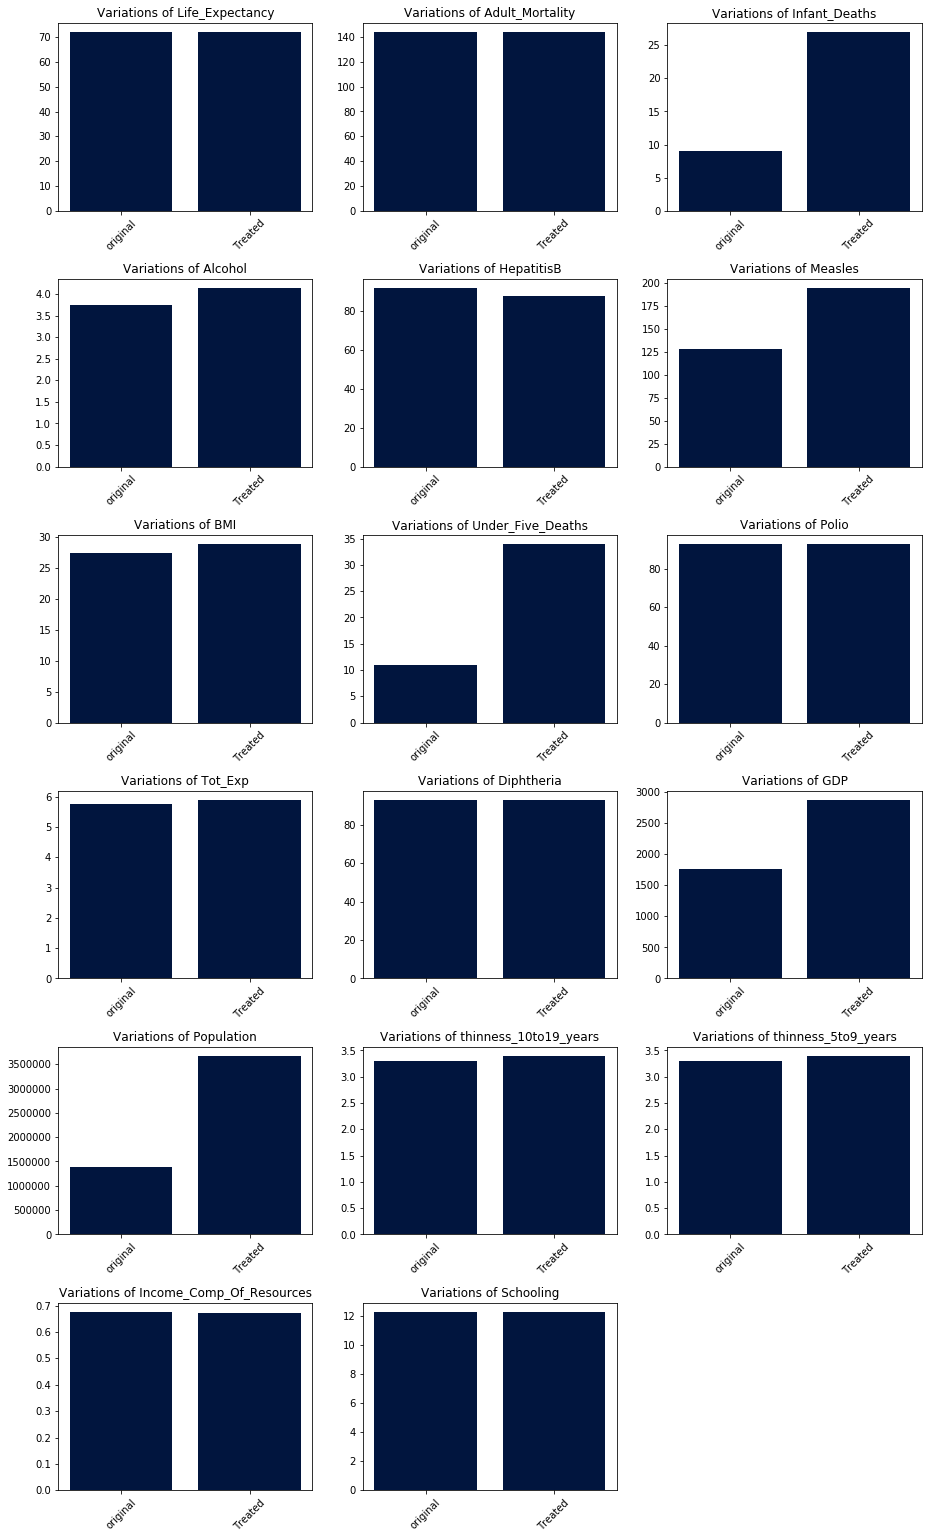

In [15]:
plt.figure(figsize=(13,60))

for i, col in enumerate(fill_list):
    df = pd.concat([le[col], le2[col]], axis=1)

    plt.subplot(len(fill_list), 3, i+1)
    plt.bar(['original', 'Treated'],df.median(), color=('xkcd:navy') )
    plt.title(f'Variations of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Our treated data set varies significantly from the original for the following variables:
- Infant_deaths
- Measles
- Under_Five_deaths
- GDP
- Population

Let's proceed with finding and treating outliers in our numerical variables. First let us visualize by using box plots and histograms

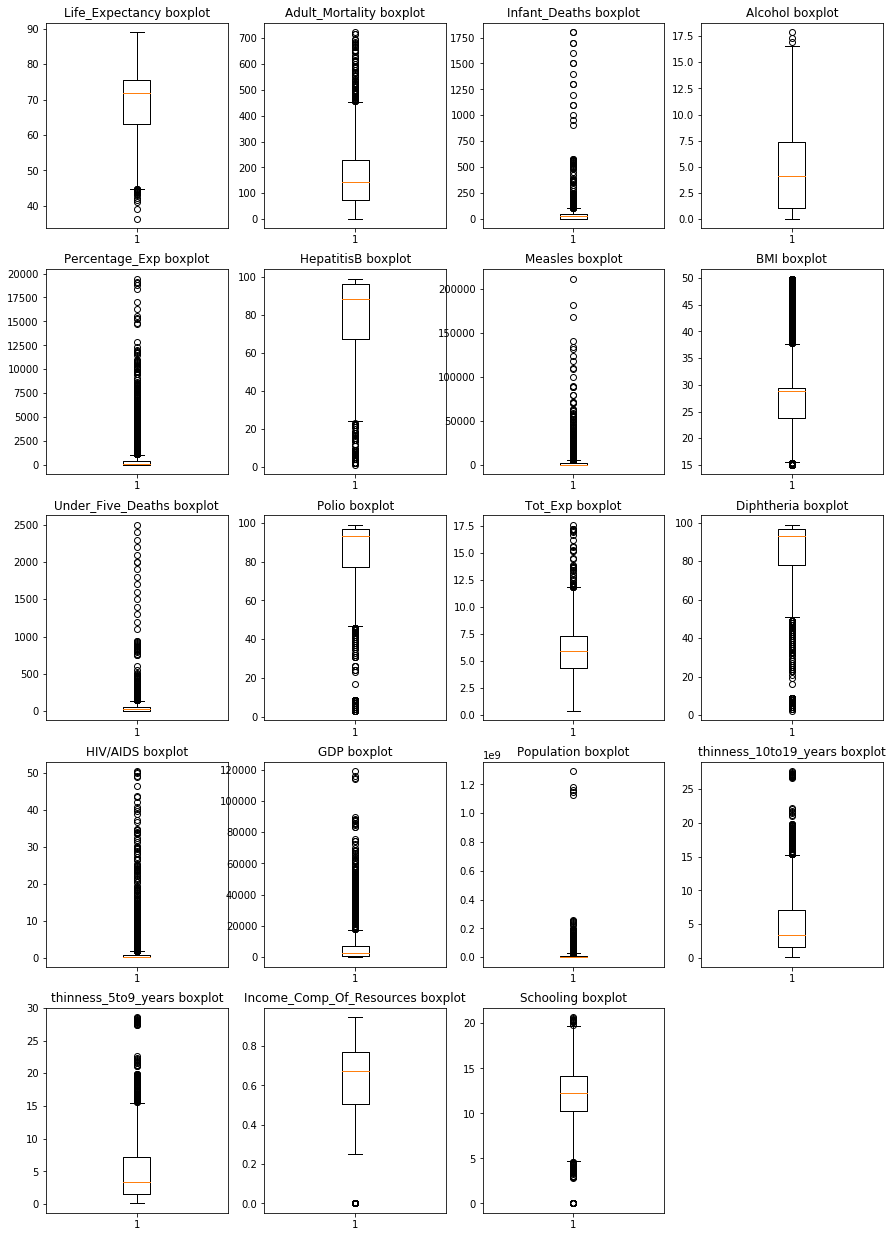

In [16]:
variables = list(le2.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in variables:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
    plt.show()
outliers_visual(le2)

I've set the whis to 10 and we can still see outliers in all variables.

Let's proceed with Tukey's Method

In [17]:
cont_vars = list(le2.columns)[3:]

def outlier_count(col, data=le2):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    
for col in cont_vars:
    outlier_count(col)

---------------Life_Expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------Adult_Mortality---------------
Number of outliers: 86
Percent of data that is outlier: 2.93%
---------------Infant_Deaths---------------
Number of outliers: 135
Percent of data that is outlier: 4.59%
---------------Alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------Percentage_Exp---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------HepatitisB---------------
Number of outliers: 292
Percent of data that is outlier: 9.94%
---------------Measles---------------
Number of outliers: 246
Percent of data that is outlier: 8.37%
---------------BMI---------------
Number of outliers: 624
Percent of data that is outlier: 21.24%
---------------Under_Five_Deaths---------------
Number of outliers: 142
Percent of data that is outlier: 4.83%
---------------Polio---------------
Number of outliers: 

We will treat outliers for each variable using the winsorize method

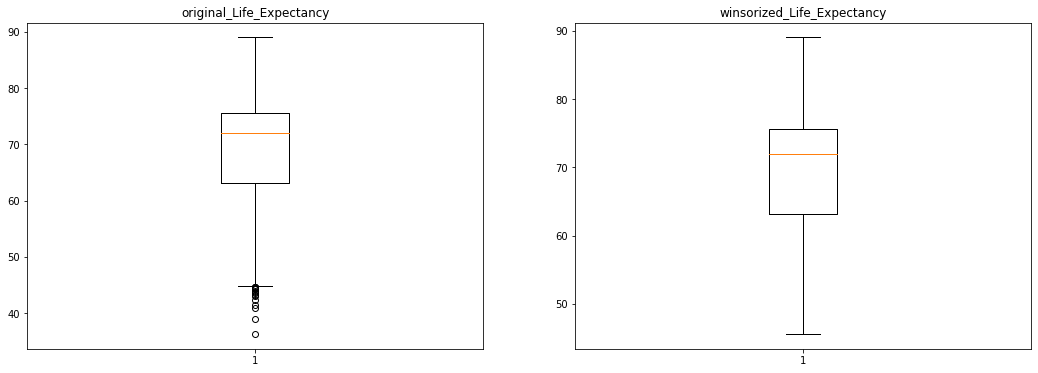

In [18]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = le2['Life_Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(le2['Life_Expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

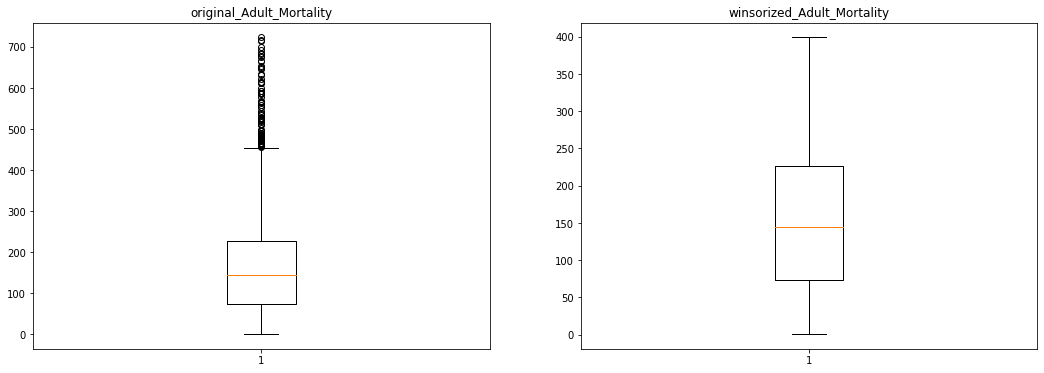

In [19]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = le2['Adult_Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(le2['Adult_Mortality'],(0,0.05))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

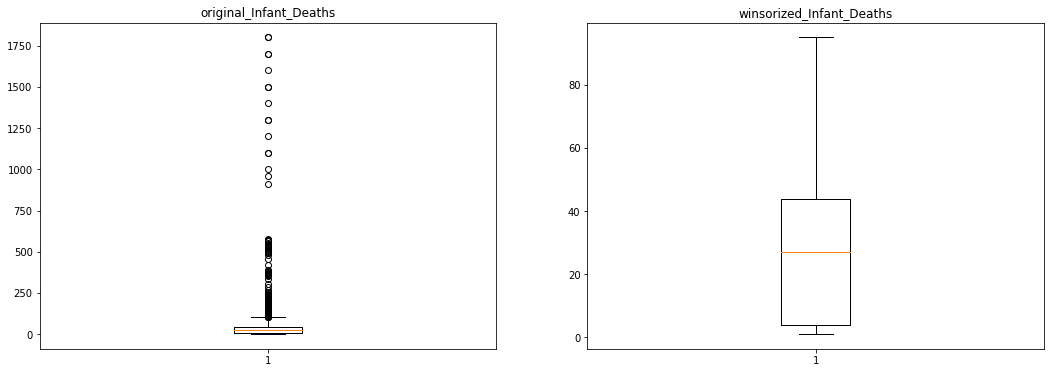

In [20]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = le2['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(le2['Infant_Deaths'],(0,0.05))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

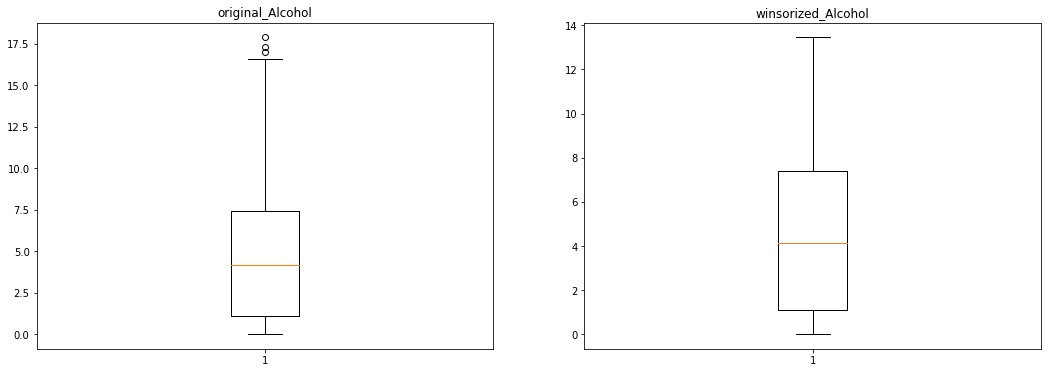

In [21]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = le2['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(le2['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

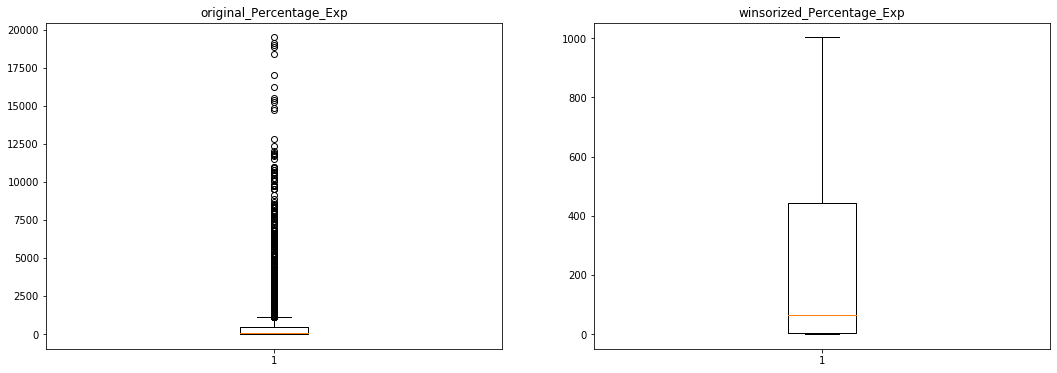

In [22]:



plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = le2['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(le2['Percentage_Exp'],(0,0.14))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

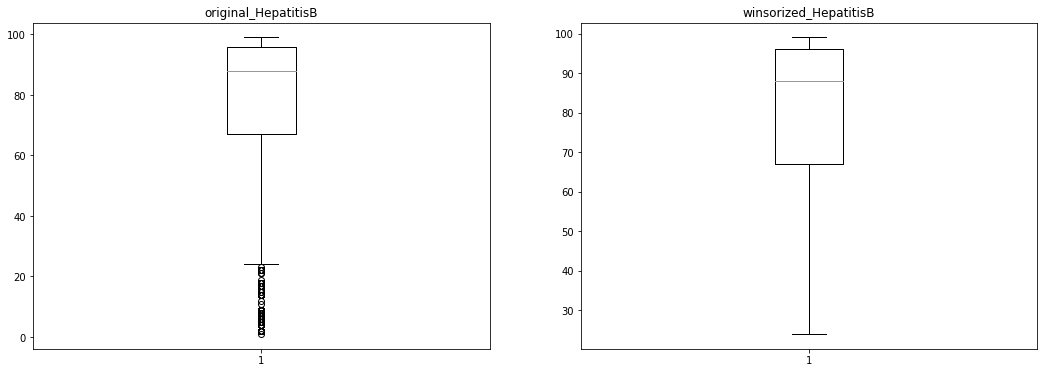

In [23]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = le2['HepatitisB']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(le2['HepatitisB'],(0.1,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

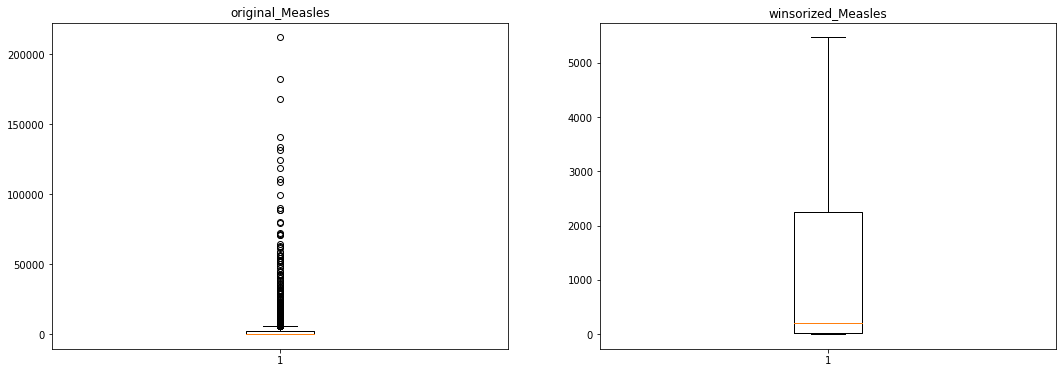

In [24]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = le2['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(le2['Measles'],(0,0.09))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

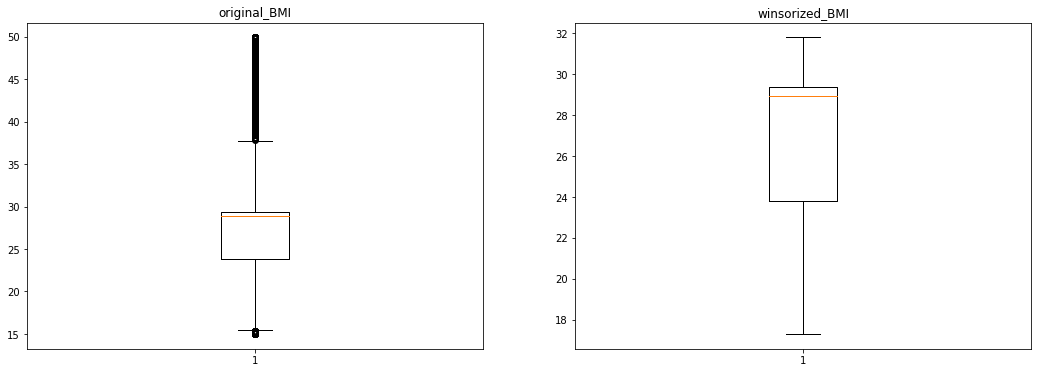

In [25]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_BMI = le2['BMI']
plt.boxplot(original_BMI)
plt.title("original_BMI")

plt.subplot(1,2,2)
winsorized_BMI = winsorize(le2['BMI'],(0.1,0.2))
plt.boxplot(winsorized_BMI)
plt.title("winsorized_BMI")

plt.show()

For BMI we are loosing 20% of the data in the highest percentiles and 10% of the data in lowest percentiles.

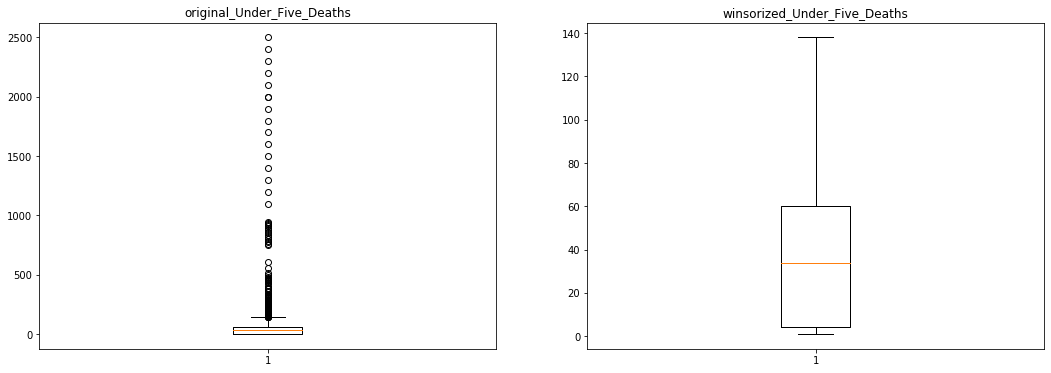

In [26]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = le2['Under_Five_Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(le2['Under_Five_Deaths'],(0,0.05))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

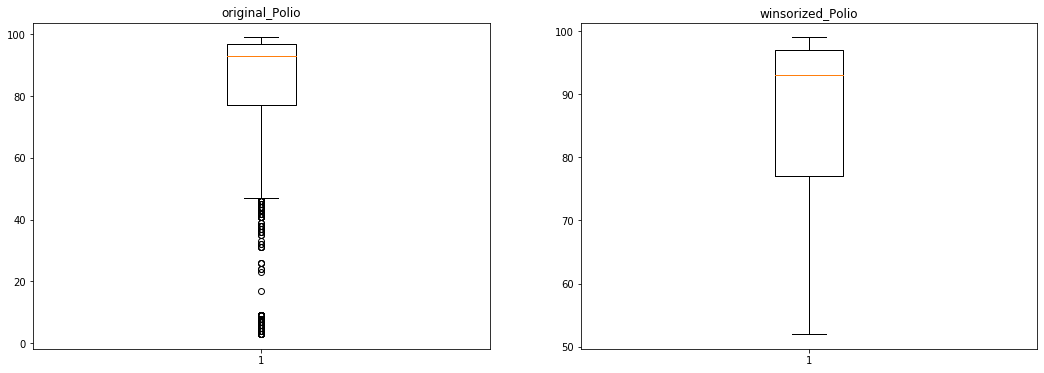

In [27]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = le2['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(le2['Polio'],(0.1,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

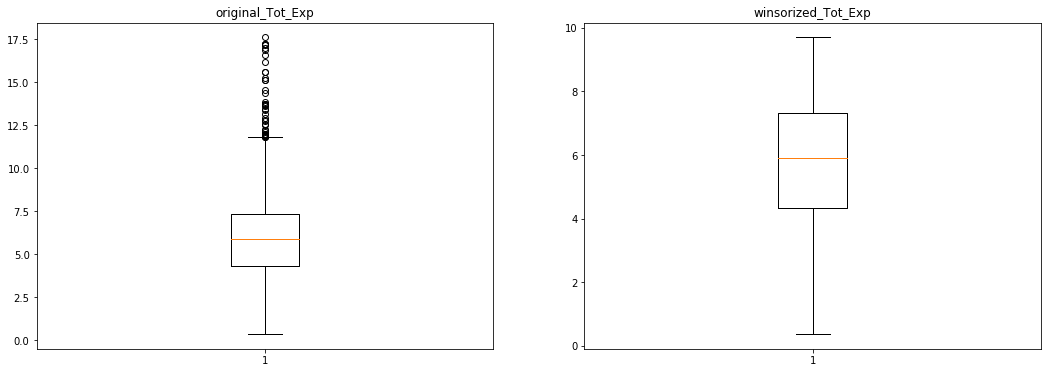

In [28]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = le2['Tot_Exp']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(le2['Tot_Exp'],(0,0.05))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

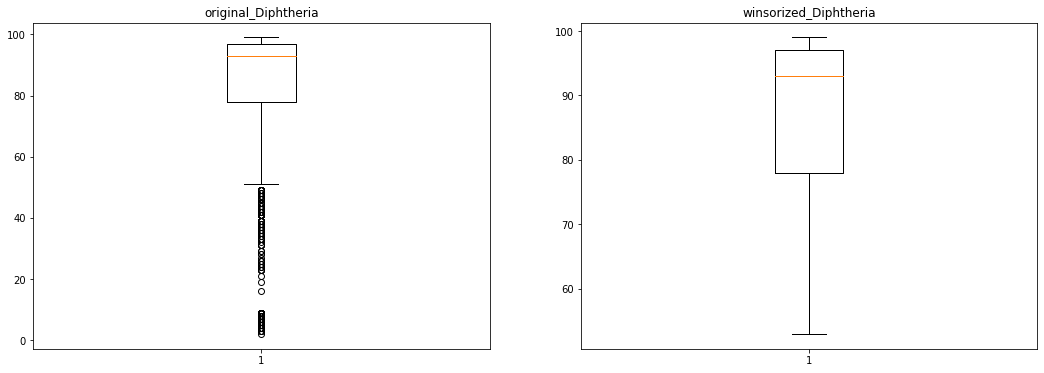

In [29]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = le2['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(le2['Diphtheria'],(0.11,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

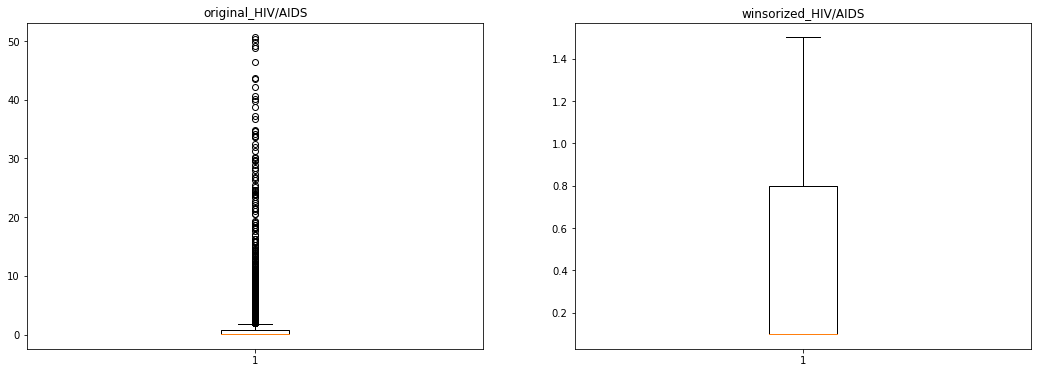

In [30]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV_AIDS = le2['HIV/AIDS']
plt.boxplot(original_HIV_AIDS)
plt.title("original_HIV/AIDS")

plt.subplot(1,2,2)
winsorized_HIV_AIDS = winsorize(le2['HIV/AIDS'],(0,0.2))
plt.boxplot(winsorized_HIV_AIDS)
plt.title("winsorized_HIV/AIDS")

plt.show()

For HIV/AIDS we are also loosing a lot of the data.

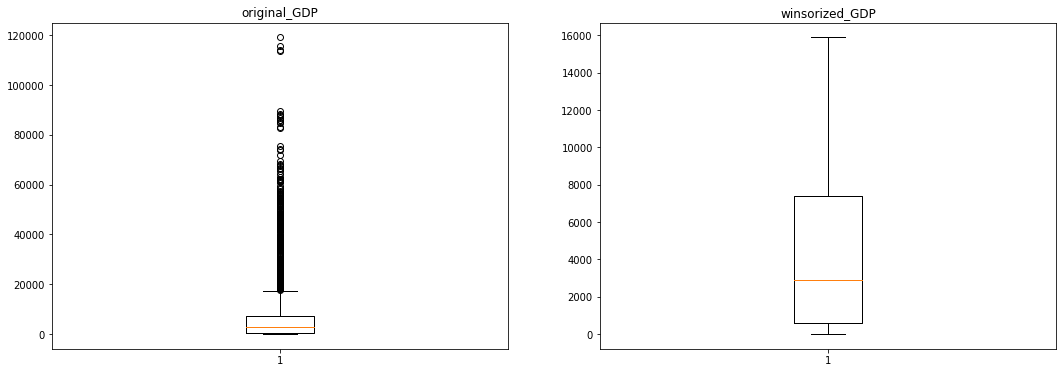

In [31]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = le2['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(le2['GDP'],(0,0.11))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

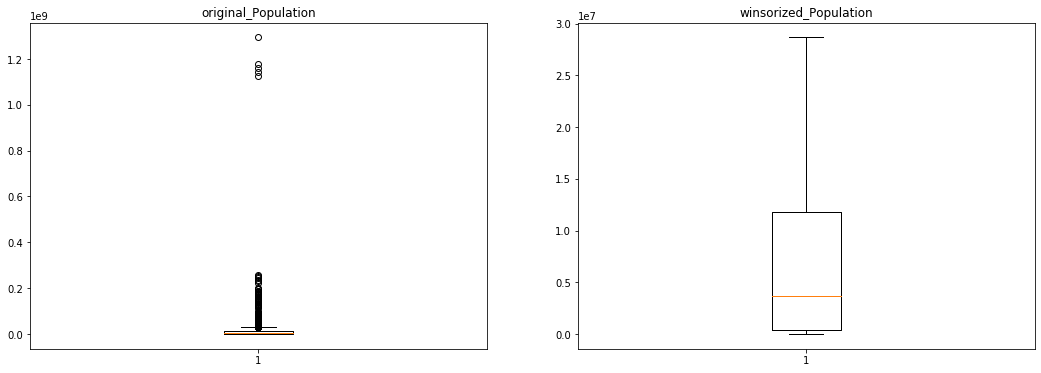

In [32]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = le2['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(le2['Population'],(0,0.07))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

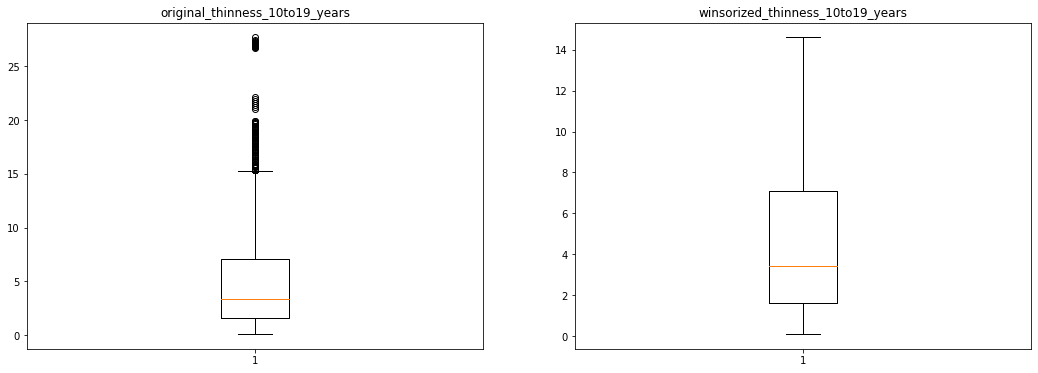

In [33]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_10to19_years = le2['thinness_10to19_years']
plt.boxplot(original_thinness_10to19_years)
plt.title("original_thinness_10to19_years")

plt.subplot(1,2,2)
winsorized_thinness_10to19_years = winsorize(le2['thinness_10to19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_10to19_years)
plt.title("winsorized_thinness_10to19_years")

plt.show()

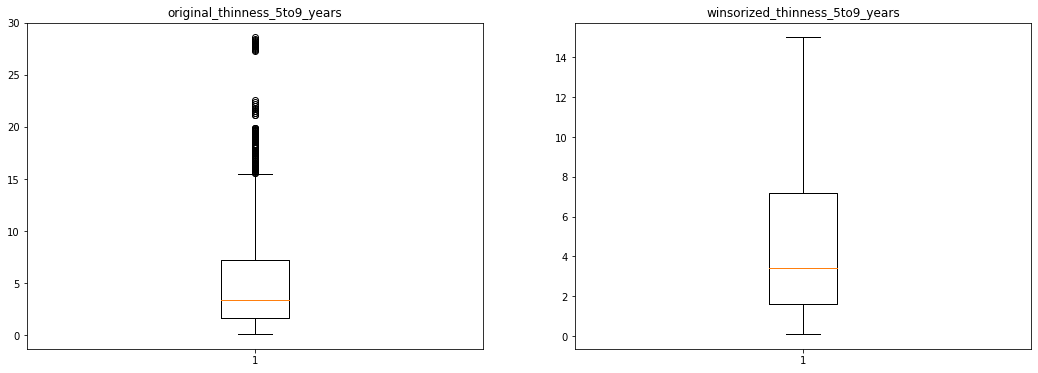

In [34]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = le2['thinness_5to9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(le2['thinness_5to9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

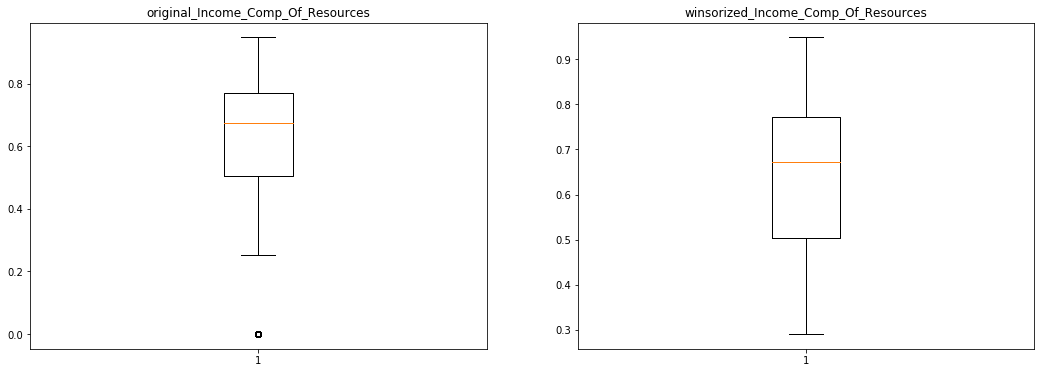

In [35]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = le2['Income_Comp_Of_Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(le2['Income_Comp_Of_Resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

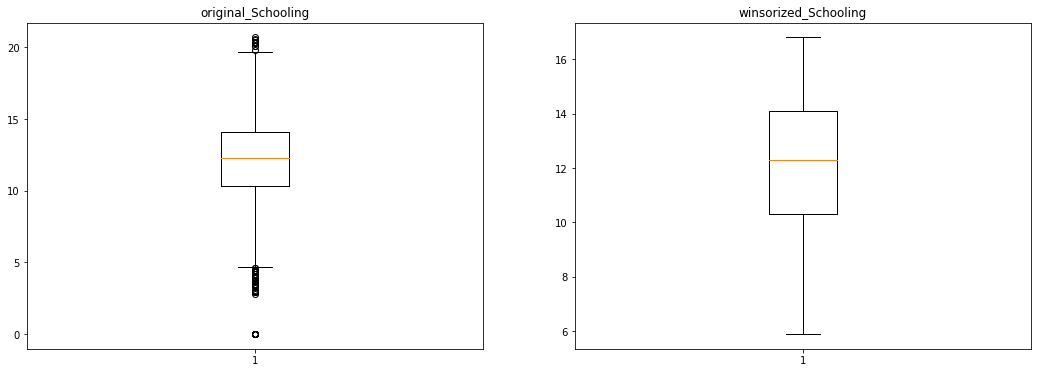

In [36]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = le2['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(le2['Schooling'],(0.05,0.05))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [37]:
 #Check number of Outliers after Winsorization for each variable.
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV_AIDS,winsorized_GDP,winsorized_Population,winsorized_thinness_10to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [38]:
# Adding winsorized variables to our existing data frame
le2['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
le2['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
le2['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
le2['winsorized_Alcohol'] = winsorized_Alcohol
le2['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
le2['winsorized_HepatitisB'] = winsorized_HepatitisB
le2['winsorized_Measles'] = winsorized_Measles
le2['winsorized_BMI'] = winsorized_BMI
le2['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
le2['winsorized_Polio'] = winsorized_Polio
le2['winsorized_Tot_Exp'] = winsorized_Tot_Exp
le2['winsorized_Diphtheria'] = winsorized_Diphtheria
le2['winsorized_HIV_AIDS'] = winsorized_HIV_AIDS
le2['winsorized_GDP'] = winsorized_GDP
le2['winsorized_Population'] = winsorized_Population
le2['winsorized_thinness_10to19_years'] = winsorized_thinness_10to19_years
le2['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
le2['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
le2['winsorized_Schooling'] = winsorized_Schooling

Will create a new winsorized data frame

In [39]:
le2_wins = pd.concat([le2.iloc[:,0:3],le2.iloc[:,-19:]],axis = 1)

# PART 2: Data Exploration
- 1) Univariate analysis

In [40]:
le2_wins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                                2938 non-null object
Year                                   2938 non-null int64
Status                                 2938 non-null object
winsorized_Life_Expectancy             2938 non-null float64
winsorized_Adult_Mortality             2938 non-null float64
winsorized_Infant_Deaths               2938 non-null float64
winsorized_Alcohol                     2938 non-null float64
winsorized_Percentage_Exp              2938 non-null float64
winsorized_HepatitisB                  2938 non-null float64
winsorized_Measles                     2938 non-null float64
winsorized_BMI                         2938 non-null float64
winsorized_Under_Five_Deaths           2938 non-null float64
winsorized_Polio                       2938 non-null float64
winsorized_Tot_Exp                     2938 non-null float64
winsorized_Diphtheria                  2938

In [41]:
le2_wins.describe(include= 'all')

,Country,Year,Status,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Measles,winsorized_BMI,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV_AIDS,winsorized_GDP,winsorized_Population,winsorized_thinness_10to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
count,2938,2938.000000,2938,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Senegal,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.248795,159.662577,28.454818,4.596872,271.234472,77.351455,1299.126975,26.960500,38.640545,85.382914,5.855641,85.434990,0.469197,4879.047103,7.508368e+06,4.676870,4.701511,0.640659,12.032141
std,NaN,4.613841,NaN,9.462136,110.084087,25.686338,3.882695,363.172291,24.386092,1804.185879,4.856404,37.732345,15.409342,2.160688,15.144813,0.569172,5208.296854,8.646842e+06,3.855884,3.913544,0.171622,2.897111
min,NaN,2000.000000,NaN,45.600000,1.000000,1.000000,0.010000,0.000000,24.000000,1.000000,17.300000,1.000000,52.000000,0.370000,53.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.291000,5.900000
25%,NaN,2004.000000,NaN,63.200000,74.000000,4.000000,1.092500,4.685343,67.000000,15.000000,23.800000,4.000000,77.000000,4.340000,78.000000,0.100000,563.517201,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,NaN,2008.000000,NaN,72.000000,144.000000,27.000000,4.140000,64.912906,88.000000,194.500000,28.934626,34.000000,93.000000,5.900000,93.000000,0.100000,2874.075216,3.675929e+06,3.400000,3.400000,0.673000,12.300000
75%,NaN,2012.000000,NaN,75.600000,227.000000,43.766917,7.390000,441.534144,96.000000,2249.836455,29.391894,60.014815,97.000000,7.330000,97.000000,0.800000,7411.904963,1.181332e+07,7.100000,7.200000,0.772000,14.100000


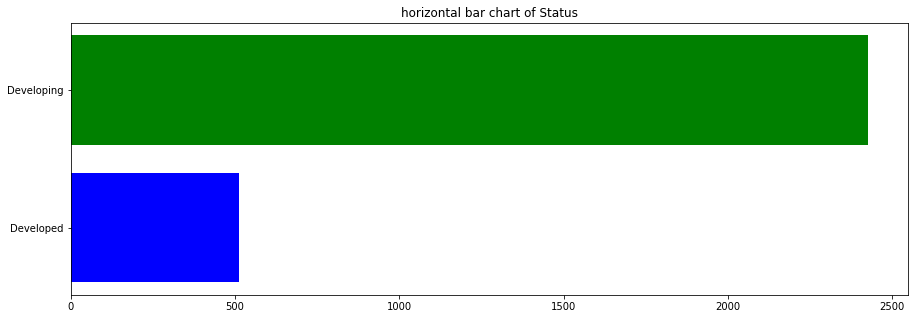

In [42]:
plt.figure(figsize=(15,5))
plt.barh(le2_wins.groupby("Status")["Status"].count().index, 
        le2_wins.groupby("Status")["Status"].count(), 
        color=["Blue","green"])
plt.title("horizontal bar chart of Status")

plt.show()

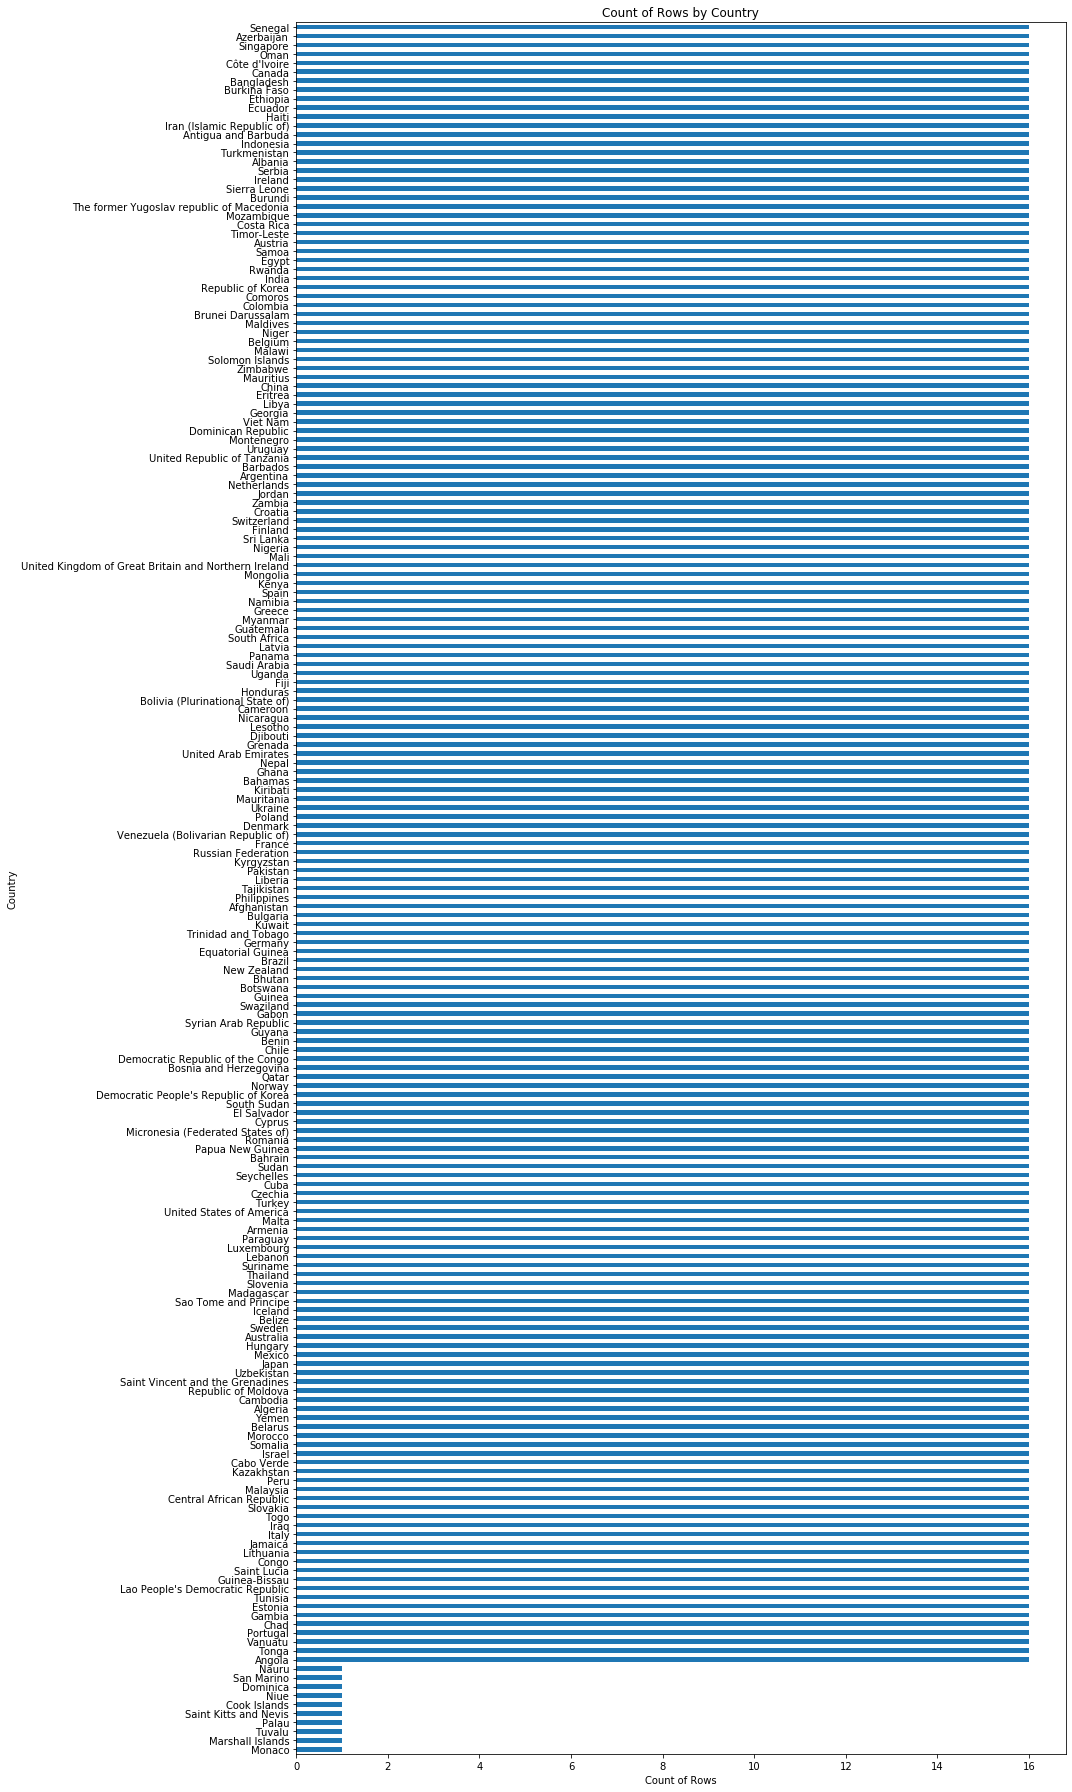

In [43]:
plt.figure(figsize=(15, 25))
le2_wins.Country.value_counts(ascending=True).plot(kind='barh')
plt.title('Count of Rows by Country')
plt.xlabel('Count of Rows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

We see here that we have 10 countries with only 1 row. This shouldn't impact our overall analysis

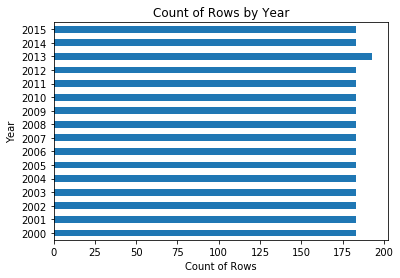

In [44]:
le2_wins.Year.value_counts().sort_index().plot(kind='barh')
plt.title('Count of Rows by Year')
plt.xlabel('Count of Rows')
plt.ylabel('Year')
plt.show()

Here we see that 2013 has 10 more rows than all other years, which is due to the 10 countries that only have 1 row of data.

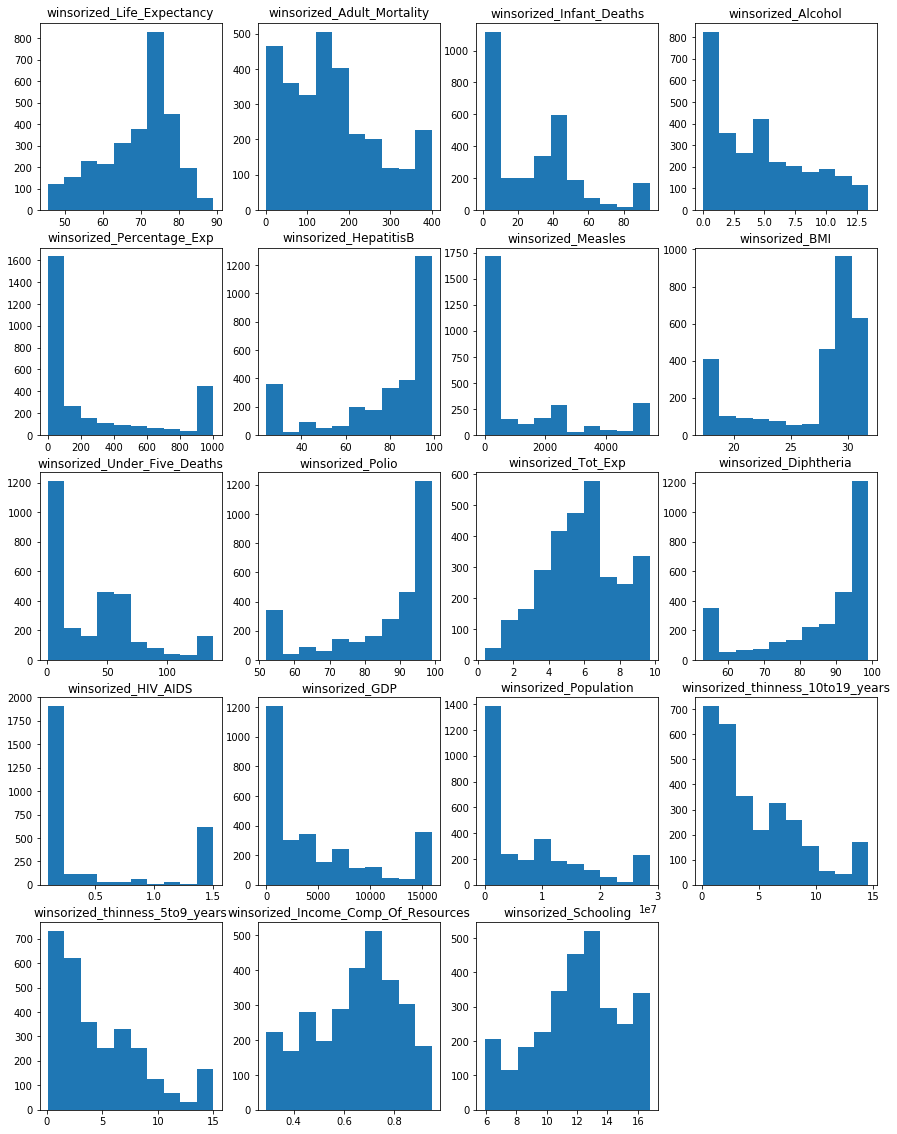

In [45]:
cont_vars=['winsorized_Life_Expectancy','winsorized_Adult_Mortality','winsorized_Infant_Deaths','winsorized_Alcohol','winsorized_Percentage_Exp','winsorized_HepatitisB','winsorized_Measles','winsorized_BMI','winsorized_Under_Five_Deaths','winsorized_Polio','winsorized_Tot_Exp','winsorized_Diphtheria','winsorized_HIV_AIDS','winsorized_GDP','winsorized_Population','winsorized_thinness_10to19_years','winsorized_thinness_5to9_years','winsorized_Income_Comp_Of_Resources','winsorized_Schooling']
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(le2_wins[col])
    plt.title(col)

Most variables are not normally distributed except for Life_Expectancy, Total_Expenditure, Incom_com_of_Resources and Schooling which appear to be normally distributed

- 2) Bivariate Analysis of Life_Expectancy with all other continuous variables

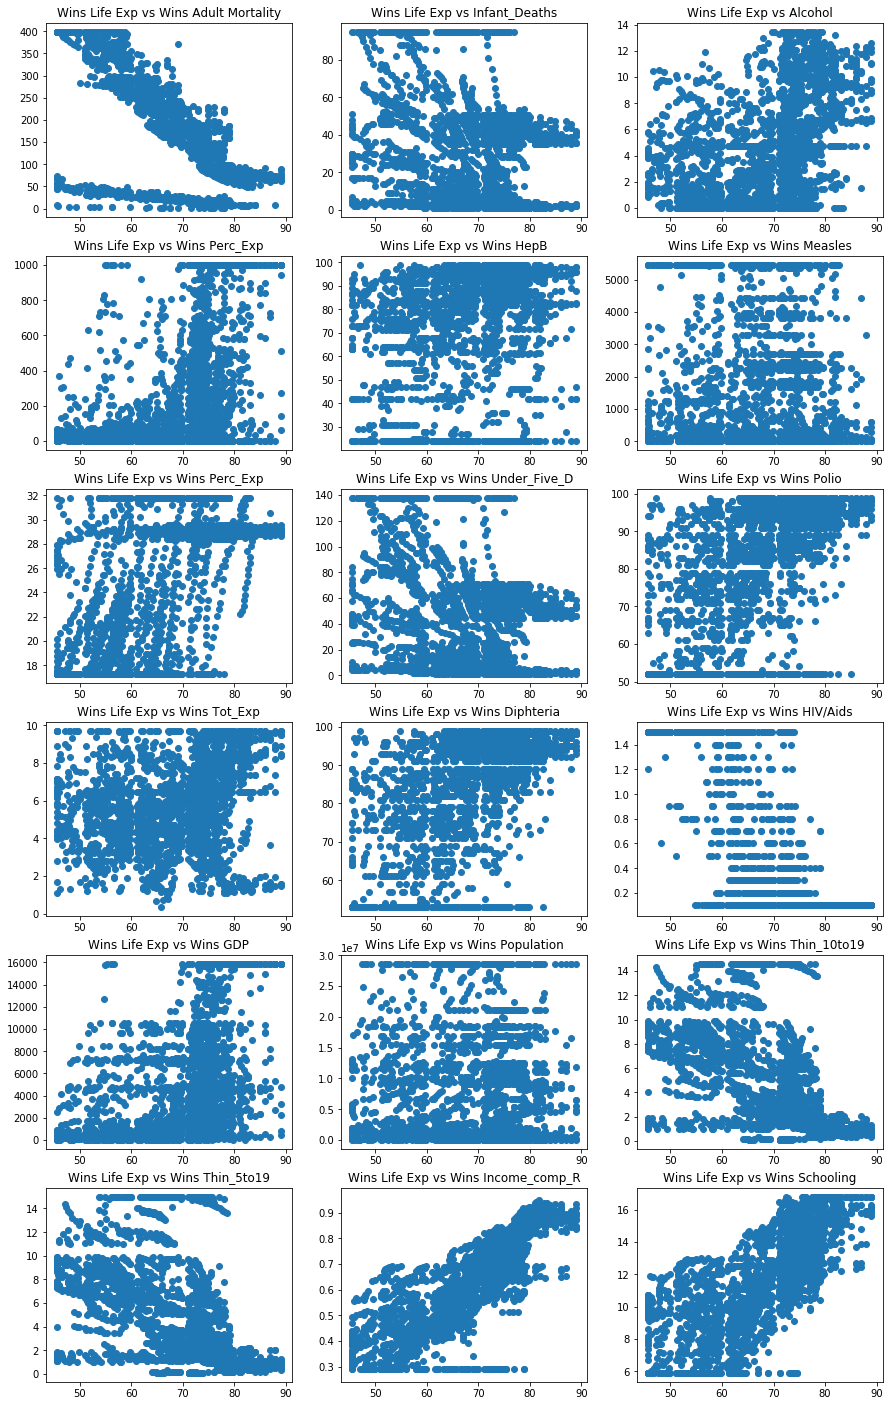

In [46]:
plt.figure(figsize=(15,25))

plt.subplot(6,3,1)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_Adult_Mortality"])
plt.title("Wins Life Exp vs Wins Adult Mortality")

plt.subplot(6,3,2)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_Infant_Deaths"])
plt.title("Wins Life Exp vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_Alcohol"])
plt.title("Wins Life Exp vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_Percentage_Exp"])
plt.title("Wins Life Exp vs Wins Perc_Exp")

plt.subplot(6,3,5)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_HepatitisB"])
plt.title("Wins Life Exp vs Wins HepB")

plt.subplot(6,3,6)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_Measles"])
plt.title("Wins Life Exp vs Wins Measles")

plt.subplot(6,3,7)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_BMI"])
plt.title("Wins Life Exp vs Wins Perc_Exp")

plt.subplot(6,3,8)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_Under_Five_Deaths"])
plt.title("Wins Life Exp vs Wins Under_Five_D")

plt.subplot(6,3,9)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_Polio"])
plt.title("Wins Life Exp vs Wins Polio")

plt.subplot(6,3,10)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_Tot_Exp"])
plt.title("Wins Life Exp vs Wins Tot_Exp")

plt.subplot(6,3,11)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_Diphtheria"])
plt.title("Wins Life Exp vs Wins Diphteria")

plt.subplot(6,3,12)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_HIV_AIDS"])
plt.title("Wins Life Exp vs Wins HIV/Aids")

plt.subplot(6,3,13)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_GDP"])
plt.title("Wins Life Exp vs Wins GDP")

plt.subplot(6,3,14)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_Population"])
plt.title("Wins Life Exp vs Wins Population")

plt.subplot(6,3,15)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_thinness_10to19_years"])
plt.title("Wins Life Exp vs Wins Thin_10to19")

plt.subplot(6,3,16)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_thinness_5to9_years"])
plt.title("Wins Life Exp vs Wins Thin_5to19")

plt.subplot(6,3,17)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_Income_Comp_Of_Resources"])
plt.title("Wins Life Exp vs Wins Income_comp_R")

plt.subplot(6,3,18)
plt.scatter(le2_wins["winsorized_Life_Expectancy"], le2_wins["winsorized_Schooling"])
plt.title("Wins Life Exp vs Wins Schooling")

plt.show()

Here we can see hints of a correlation between Life_Expectancy and Adult_Mortality, Income_Comp_of_Resources and Schooling

In [47]:
le2_wins[cont_vars].corr()

,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Measles,winsorized_BMI,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV_AIDS,winsorized_GDP,winsorized_Population,winsorized_thinness_10to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
winsorized_Life_Expectancy,1.000000,-0.682559,-0.225461,0.395243,0.488499,0.328589,-0.183093,0.561388,-0.298626,0.574335,0.235161,0.582653,-0.796989,0.514775,0.011363,-0.522380,-0.517887,0.792878,0.749297
winsorized_Adult_Mortality,-0.682559,1.000000,0.125847,-0.206722,-0.328309,-0.199552,0.101158,-0.339592,0.170105,-0.365165,-0.149014,-0.367987,0.594954,-0.333240,0.003656,0.350179,0.356466,-0.526011,-0.478268
winsorized_Infant_Deaths,-0.225461,0.125847,1.000000,-0.060359,-0.101970,-0.164935,0.328412,-0.367477,0.970848,-0.221185,-0.083130,-0.230546,0.127283,-0.069280,0.175608,0.196880,0.203699,-0.182852,-0.201016
winsorized_Alcohol,0.395243,-0.206722,-0.060359,1.000000,0.381669,0.090158,-0.115037,0.298371,-0.104771,0.268336,0.312323,0.275950,-0.204047,0.398044,-0.035614,-0.439403,-0.429372,0.473339,0.522581
winsorized_Percentage_Exp,0.488499,-0.328309,-0.101970,0.381669,1.000000,0.100428,-0.164810,0.304421,-0.135373,0.271186,0.177057,0.274013,-0.304050,0.702315,-0.072175,-0.334179,-0.335560,0.555798,0.534479
winsorized_HepatitisB,0.328589,-0.199552,-0.164935,0.090158,0.100428,1.000000,-0.177070,0.288203,-0.201645,0.580514,0.111194,0.640282,-0.313393,0.144157,0.018322,-0.151896,-0.160540,0.299179,0.307760
winsorized_Measles,-0.183093,0.101158,0.328412,-0.115037,-0.164810,-0.177070,1.000000,-0.181962,0.344552,-0.202921,-0.110963,-0.198197,0.101535,-0.166798,0.106506,0.156772,0.159475,-0.206687,-0.215825
winsorized_BMI,0.561388,-0.339592,-0.367477,0.298371,0.304421,0.288203,-0.181962,1.000000,-0.426935,0.419955,0.199213,0.425421,-0.455514,0.315810,-0.077180,-0.586111,-0.593354,0.529830,0.521006
winsorized_Under_Five_Deaths,-0.298626,0.170105,0.970848,-0.104771,-0.135373,-0.201645,0.344552,-0.426935,1.000000,-0.281303,-0.098237,-0.291741,0.198469,-0.111276,0.180288,0.233862,0.235725,-0.253539,-0.271457
winsorized_Polio,0.574335,-0.365165,-0.221185,0.268336,0.271186,0.580514,-0.202921,0.419955,-0.281303,1.000000,0.174095,0.860108,-0.478550,0.328096,0.009073,-0.289605,-0.286980,0.524236,0.532595


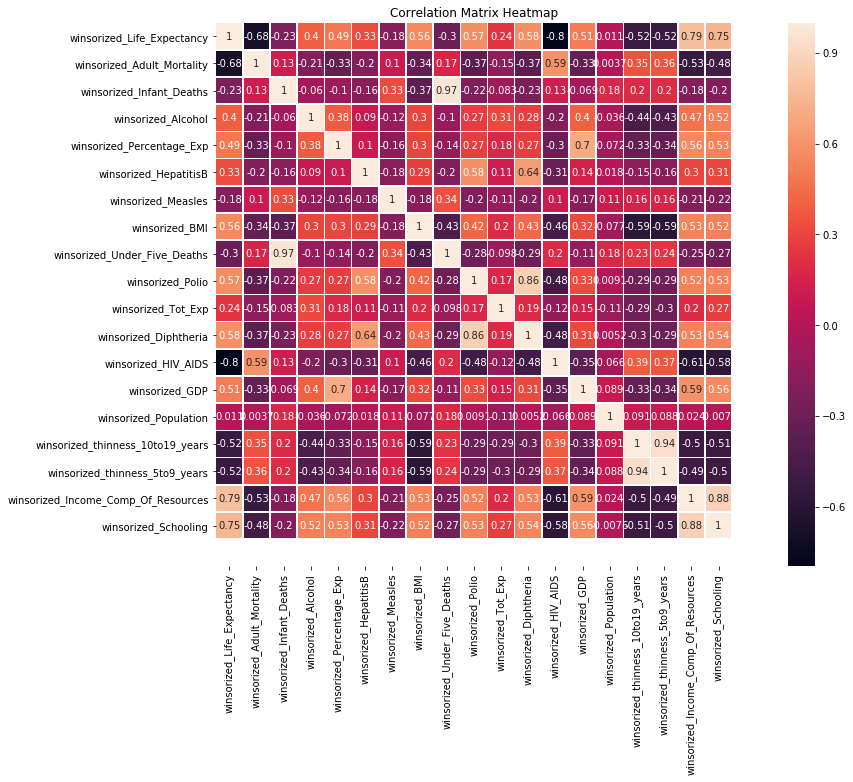

In [48]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(le2_wins[cont_vars].corr(), square=True, annot=True, linewidths=.5)
plt.ylim(20, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Here we can see that there are stronger than average (>0.5 or <-0.5) correlations with the following variables:
- Negatively correlated: 
    - HIV Aids variable
    - Adult Mortality
    - Thinness_10to19_years
    - Thinness_5to9_years
- Positively correlated:
    - BMI
    - Polio
    - Diphtheria
    - Income_Comp_of_Resources
    - Schooling

- 3) Bi Variate analysis of Continuous vs Categorical

In [49]:
le2_wins.groupby("Status").mean()

,Year,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Measles,winsorized_BMI,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV_AIDS,winsorized_GDP,winsorized_Population,winsorized_thinness_10to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
Status,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,27.774192,9.533105,599.246259,82.448479,503.319505,28.952000,34.917279,94.324219,7.201276,94.335938,0.100000,9797.903385,6.406971e+06,1.320703,1.296680,0.831395,15.170448
Developing,2007.522671,67.149077,176.541488,28.598462,3.555095,202.008571,76.275743,1467.079746,26.540199,39.426329,83.495878,5.571649,83.556472,0.547115,3840.937286,7.740814e+06,5.385179,5.420091,0.600405,11.369811


We can see that there is a significant difference in mean between Developped and Developping for most variables

In [50]:
# Test whether group differences are significant.
import scipy.stats as stats
status = le2_wins["Status"].unique()
grouped_df = le2_wins.groupby("Status")
for var in [cont_vars]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(status)):
        for j in range(i+1, len(status)):
            print("t-test between groups {0} and {1}:".format(status[i], status[j]))
            print(stats.ttest_ind(
                le2_wins[le2_wins["Status"]==status[i]][var], 
                le2_wins[le2_wins["Status"]==status[j]][var]
            ))

------------------------------------------------
Comparisons for variable: ['winsorized_Life_Expectancy', 'winsorized_Adult_Mortality', 'winsorized_Infant_Deaths', 'winsorized_Alcohol', 'winsorized_Percentage_Exp', 'winsorized_HepatitisB', 'winsorized_Measles', 'winsorized_BMI', 'winsorized_Under_Five_Deaths', 'winsorized_Polio', 'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV_AIDS', 'winsorized_GDP', 'winsorized_Population', 'winsorized_thinness_10to19_years', 'winsorized_thinness_5to9_years', 'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling']
------------------------------------------------
t-test between groups Developing and Developed:
Ttest_indResult(statistic=array([-29.89864988,  19.18831461,   0.65975103, -38.99762698,
       -24.71499285,  -5.22790978,  11.21439899, -10.3957658 ,
         2.45922718, -14.98889836, -16.18183731, -15.19694306,
        16.91825742, -26.09839063,   3.17667531,  23.64323027,
        23.63065308, -32.18175862, -31.09470631

P Values are all <0.05 so the difference is statistically significant between developped and developping countries regarding all variables. 

In summary we will keep the 9 continuous variables we identified above as well as the Status variable

# Part 3: Feature Engeneering

In [51]:
# append dummies to our winsorized dataframe
le_final = pd.concat([le2_wins, pd.get_dummies(le2_wins["Status"])], axis=1)

#Only keep correlated variables

le_final.drop(columns=['Year','Status','winsorized_Infant_Deaths','winsorized_Alcohol','winsorized_Percentage_Exp','winsorized_HepatitisB','winsorized_Measles','winsorized_Under_Five_Deaths','winsorized_Tot_Exp','winsorized_GDP','winsorized_Population'], inplace=True)
le_final.head()


,Country,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_BMI,winsorized_Polio,winsorized_Diphtheria,winsorized_HIV_AIDS,winsorized_thinness_10to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,Developed,Developing
0,Afghanistan,65.0,263.0,19.100000,52.0,65.0,0.1,14.6,15.0,0.479,10.1,0,1
16,Albania,77.8,74.0,28.840789,99.0,99.0,0.1,1.2,1.3,0.762,14.2,0,1
32,Algeria,75.6,19.0,28.840789,95.0,95.0,0.1,6.0,5.8,0.743,14.4,0,1
49,Angola,52.4,335.0,23.300000,52.0,64.0,1.5,8.3,8.2,0.531,11.4,0,1
65,Antigua and Barbuda,76.4,13.0,31.800000,86.0,99.0,0.2,3.3,3.3,0.784,13.9,0,1


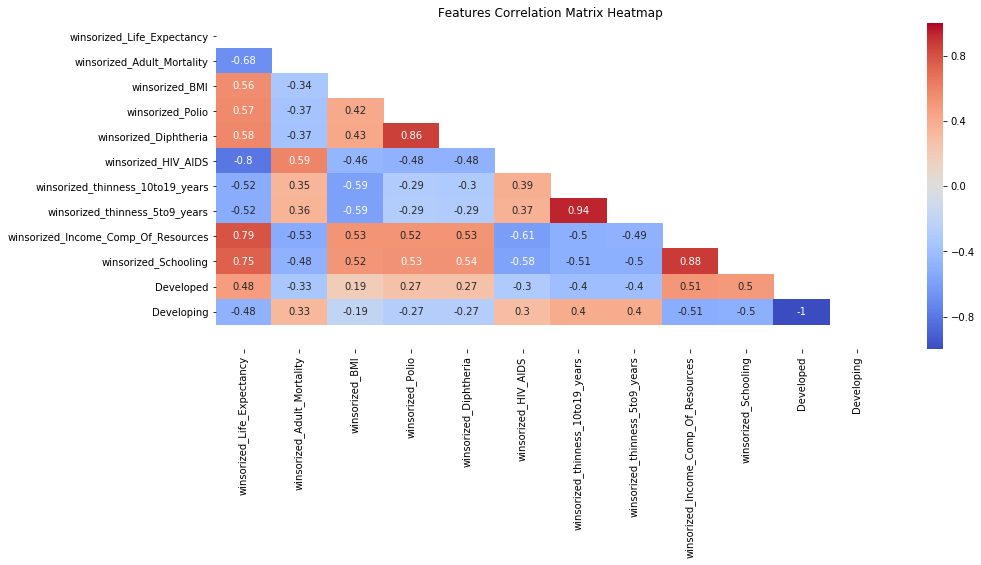

In [52]:
def feat_heatmap():
    mask = np.triu(le_final.corr())
    plt.figure(figsize=(15,6))
    sns.heatmap(le_final.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    plt.ylim(len(le_final.columns), 0)
    plt.title('Features Correlation Matrix Heatmap')
    plt.show()
feat_heatmap()

For our PCA, we need continuous variables. We know from earlier that most of our variables are not normally distributed. Fu I will use the BoxCox transformation to address this issue on the 9 variables that appear to be correlated with life expectancy. Furthermore I see that :
- Thinness_5_9_years is highly correlated with thinness_10to_19 years
- Income_Comp_of_Resources is highly correlated with Schooling
- Polio is highly correlated with Diphtheria

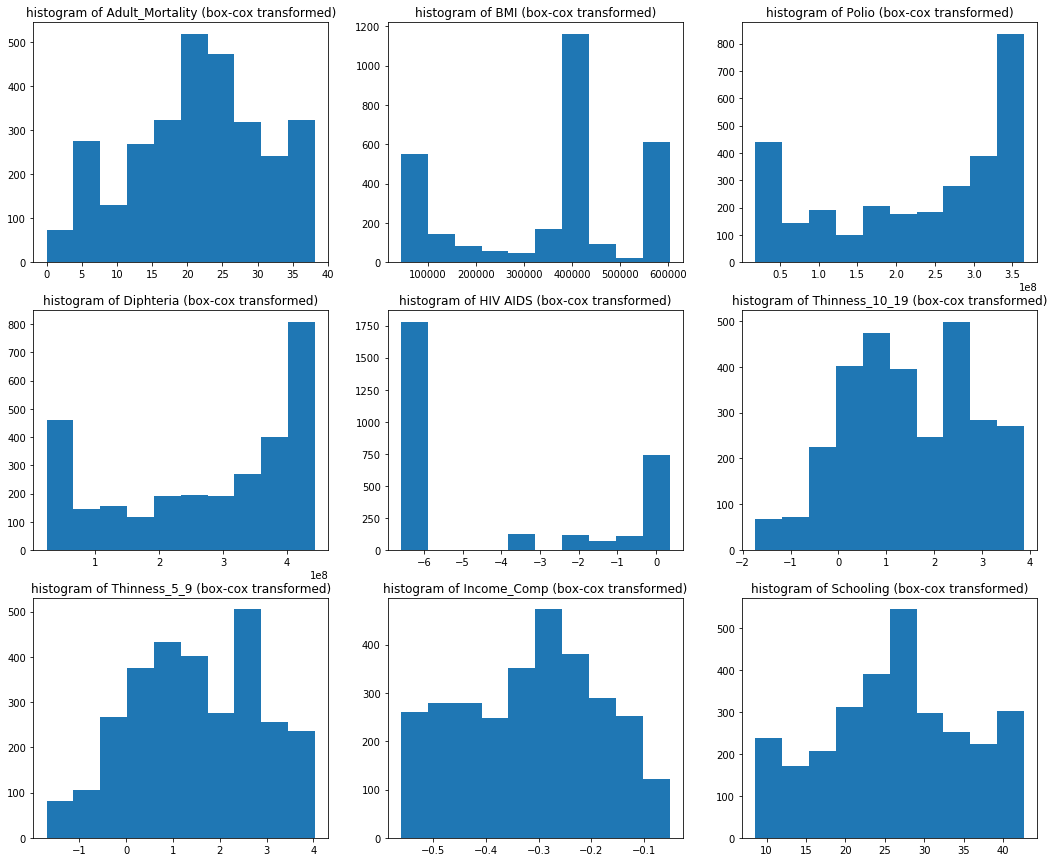

In [53]:
from scipy.stats import boxcox

Adult_Mortality_boxcox,_ = boxcox(le_final["winsorized_Adult_Mortality"])
BMI_boxcox,_ = boxcox(le_final["winsorized_BMI"])
Polio_boxcox,_ = boxcox(le_final["winsorized_Polio"])
Diphteria_boxcox,_ = boxcox(le_final["winsorized_Diphtheria"])
HIV_AIDS_boxcox,_ = boxcox(le_final["winsorized_HIV_AIDS"])
thinness_10to19_boxcox,_ = boxcox(le_final["winsorized_thinness_10to19_years"])
thinness_5to9_boxcox,_ = boxcox(le_final["winsorized_thinness_5to9_years"])
Income_Comp_of_Resouces_boxcox,_ = boxcox(le_final["winsorized_Income_Comp_Of_Resources"])
Schooling_boxcox,_ = boxcox(le_final["winsorized_Schooling"])

plt.figure(figsize=(18,15))

# histograms of the box-cox transformed data
plt.subplot(3, 3, 1)
plt.hist(Adult_Mortality_boxcox)
plt.title("histogram of Adult_Mortality (box-cox transformed)")

plt.subplot(3, 3, 2)
plt.hist(BMI_boxcox)
plt.title("histogram of BMI (box-cox transformed)")
                            
plt.subplot(3, 3, 3)
plt.hist(Polio_boxcox)
plt.title("histogram of Polio (box-cox transformed)")
                            
plt.subplot(3, 3, 4)
plt.hist(Diphteria_boxcox)
plt.title("histogram of Diphteria (box-cox transformed)")

plt.subplot(3, 3, 5)
plt.hist(HIV_AIDS_boxcox)
plt.title("histogram of HIV AIDS (box-cox transformed)")

plt.subplot(3, 3, 6)
plt.hist(thinness_10to19_boxcox)
plt.title("histogram of Thinness_10_19 (box-cox transformed)")

plt.subplot(3, 3, 7)
plt.hist(thinness_5to9_boxcox)
plt.title("histogram of Thinness_5_9 (box-cox transformed)")

plt.subplot(3, 3, 8)
plt.hist(Income_Comp_of_Resouces_boxcox)
plt.title("histogram of Income_Comp (box-cox transformed)")

plt.subplot(3, 3, 9)
plt.hist(Schooling_boxcox)
plt.title("histogram of Schooling (box-cox transformed)")

plt.show()


Let's formally test for normality using the Jarque Bera and Normal Tests

In [54]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(Adult_Mortality_boxcox)
norm_stats = normaltest(Adult_Mortality_boxcox)

print('-'*15+'Adult_Mortality Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(BMI_boxcox)
norm_stats = normaltest(BMI_boxcox)

print('-'*15+'BMI_boxcox Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(Polio_boxcox)
norm_stats = normaltest(Polio_boxcox)

print('-'*15+'Polio_boxcox Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(Diphteria_boxcox)
norm_stats = normaltest(Diphteria_boxcox)

print('-'*15+'Diphteria_boxcox Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(HIV_AIDS_boxcox)
norm_stats = normaltest(HIV_AIDS_boxcox)

print('-'*15+'HIV_AIDS_boxcox Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(thinness_10to19_boxcox)
norm_stats = normaltest(thinness_10to19_boxcox)

print('-'*15+'thinness_10to19_boxcox Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(thinness_5to9_boxcox)
norm_stats = normaltest(thinness_5to9_boxcox)

print('-'*15+'thinness_5to9_boxcox Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(Income_Comp_of_Resouces_boxcox)
norm_stats = normaltest(Income_Comp_of_Resouces_boxcox)

print('-'*15+'Income_Comp_of_Resouces_boxcox Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(Schooling_boxcox)
norm_stats = normaltest(Schooling_boxcox)

print('-'*15+'Schooling_boxcox Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


---------------Adult_Mortality Normal Distribution Tests---------------
Jarque-Bera test statistics is 70.64167253849465 and p value is 4.440892098500626e-16
Normality test statistics is 160.1562814486887 and p value is 1.6691884169806408e-35
---------------BMI_boxcox Normal Distribution Tests---------------
Jarque-Bera test statistics is 204.19583167648605 and p value is 0.0
Normality test statistics is 612.3837532056207 and p value is 1.0533133480682208e-133
---------------Polio_boxcox Normal Distribution Tests---------------
Jarque-Bera test statistics is 308.92439122152206 and p value is 0.0
Normality test statistics is 2054.0309951103477 and p value is 0.0
---------------Diphteria_boxcox Normal Distribution Tests---------------
Jarque-Bera test statistics is 302.1057533186924 and p value is 0.0
Normality test statistics is 2005.368810147728 and p value is 0.0
---------------HIV_AIDS_boxcox Normal Distribution Tests---------------
Jarque-Bera test statistics is 456.4072486012706 an

Here we see that the following variables failed to be normalized:
- Polio
- Diphtheria
- HIV/AIDS 
- Income Comp of Resources (only the Jarque Bera test)

Furthermore, Income_comp_of_resources is hihghly correlated with Schooling and Thinness_10to19_years is highly correlated with Thinness_5to9_years

We will proceed with the following variables for our PCA:
- Adult Mortality
- BMI
- Thinness_5to9_years
- Schooling

In [55]:
le_final.head()

,Country,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_BMI,winsorized_Polio,winsorized_Diphtheria,winsorized_HIV_AIDS,winsorized_thinness_10to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,Developed,Developing
0,Afghanistan,65.0,263.0,19.100000,52.0,65.0,0.1,14.6,15.0,0.479,10.1,0,1
16,Albania,77.8,74.0,28.840789,99.0,99.0,0.1,1.2,1.3,0.762,14.2,0,1
32,Algeria,75.6,19.0,28.840789,95.0,95.0,0.1,6.0,5.8,0.743,14.4,0,1
49,Angola,52.4,335.0,23.300000,52.0,64.0,1.5,8.3,8.2,0.531,11.4,0,1
65,Antigua and Barbuda,76.4,13.0,31.800000,86.0,99.0,0.2,3.3,3.3,0.784,13.9,0,1


In [56]:
le_final.drop(columns=['Country','winsorized_Life_Expectancy','winsorized_Polio','winsorized_Diphtheria','winsorized_HIV_AIDS','winsorized_thinness_10to19_years','winsorized_Income_Comp_Of_Resources','Developed','Developing'], inplace=True)


In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 


X = scale(le_final)
sklearn_pca = PCA()
Y = sklearn_pca.fit_transform(X)
print('Explained variance by Principal Components:', sklearn_pca.explained_variance_ratio_)
print('Eigenvalues:', sklearn_pca.explained_variance_)

Explained variance by Principal Components: [0.60054522 0.1830645  0.11633682 0.10005346]
Eigenvalues: [2.40299879 0.73250734 0.46550571 0.4003501 ]


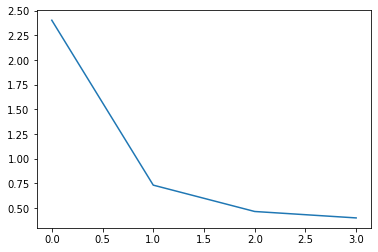

PC1 Explained Variance: 60.05%
PC2 Explained Variance: 18.31%
PC3 Explained Variance: 11.63%


In [58]:
plt.plot(sklearn_pca.explained_variance_)
plt.show()
print('PC1 Explained Variance:', str(round(sklearn_pca.explained_variance_ratio_[0]*100, 2))+'%')
print('PC2 Explained Variance:', str(round(sklearn_pca.explained_variance_ratio_[1]*100, 2))+'%')
print('PC3 Explained Variance:', str(round(sklearn_pca.explained_variance_ratio_[2]*100, 2))+'%')

We explained 89.99% of the variance with our 3 components.

# Summary:

Through our Data Cleaning, Data Exploration and PCA analysis I have learned more on which factors affect Life_Expectancy. 
I found numerous issues with the data set in the Data Cleaning phase. Amongts which are multiple variables with many nulls (GDP and Population for example), non-sensical values for certain variables such as BMI or Infant_Deaths and finally addressed the outliers. In the Data Exploration phase, I narrowed down the important factors by examining the correlation matrix. 

In [59]:
le_final.head()

,winsorized_Adult_Mortality,winsorized_BMI,winsorized_thinness_5to9_years,winsorized_Schooling
0,263.0,19.100000,15.0,10.1
16,74.0,28.840789,1.3,14.2
32,19.0,28.840789,5.8,14.4
49,335.0,23.300000,8.2,11.4
65,13.0,31.800000,3.3,13.9
